In [2]:
import numpy as np
import xarray as xr

In [3]:
# There are no NaN in  TaiESm1
ds = xr.open_dataset('/g/data/oi10/replicas/CMIP6/CMIP/AS-RCEC/TaiESM1/historical/r1i1p1f1/Amon/ta/gn/v20200623/ta_Amon_TaiESM1_historical_r1i1p1f1_gn_185001-201412.nc')
da = ds['ta'].isel(time = 0)
if np.isnan(da).any():
    print("There are NaN values in the DataArray.")
else:
    print("There are no NaN values in the DataArray.")

ERROR 1: PROJ: proj_create_from_database: Open of /g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/share/proj failed


There are no NaN values in the DataArray.


In [4]:
ds = xr.open_dataset('/g/data/oi10/replicas/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/ta/gr/v20180803/ta_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc')
da = ds['ta'].isel(time = 0)
if np.isnan(da).any():
    print("There are NaN values in the DataArray.")
else:
    print("There are no NaN values in the DataArray.")

There are NaN values in the DataArray.


In [5]:
da.plev

<xarray.DataArray 'plev' (plev: 19)>
array([100000.,  92500.,  85000.,  70000.,  60000.,  50000.,  40000.,  30000.,
        25000.,  20000.,  15000.,  10000.,   7000.,   5000.,   3000.,   2000.,
         1000.,    500.,    100.], dtype=float32)
Coordinates:
  * plev     (plev) float32 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
    time     datetime64[ns] 1850-01-16T12:00:00
Attributes:
    name:           plev
    standard_name:  air_pressure
    long_name:      pressure
    units:          Pa
    positive:       down

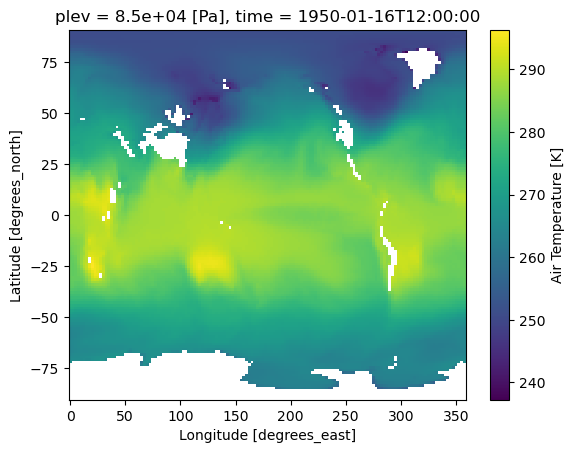

In [10]:
da = ds['ta'].isel(time = 1200)
da.sel(plev = 850e2).plot()